In [3]:
# Importing libraries
import re
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")
figsize = (16,8)

In [4]:
# Importing the dataset
df = pd.read_csv('Resource/Traffic_Violations.csv', low_memory=False)
# Giving the dimension information
print('Dataframe dimensions:', df.shape)
#____________________________________________________________
# Giving some infos on columns types and number of null values
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

FileNotFoundError: File b'Resource/Traffic_Violations.csv' does not exist

In [3]:
#list available fields
df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

In [4]:
#data = df.dropna(subset=[‘Geolocation’])

#data = df.dropna(axis=0, how='any', thresh=None, subset=['Geolocation'], inplace=False)
#data.count()

In [5]:
#Extracting  State row from the entire data
data = df[df.State == 'MD']
#data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,9/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2008.0,FORD,4S,BLACK,Citation,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
2,12/1/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,8/29/2017,9:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,8/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2015.0,MINI COOPER,2S,WHITE,Citation,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN
5,8/27/2013,0:55:00,MCP,"2nd district, Bethesda",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,CONNECTICUT/CHEVY CHASE LAKE,NaN,NaN,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2013.0,HYUNDAI,ELANTRA,GRAY,Citation,21-901.1(b),Transportation Article,No,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,NaN


In [6]:
#Extracting  State row from the entire data
data=data.dropna(how='any')
data.head()

,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,Fatal,Commercial License,HAZMAT,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,Model,Color,Violation Type,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
2,12/1/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,2001.0,HONDA,ACCORD,SILVER,Citation,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,8/29/2017,9:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,No,Yes,No,No,No,No,No,No,MD,02 - Automobile,1998.0,DODG,DAKOTA,WHITE,Citation,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
6,10/8/2013,13:23:00,MCP,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,1993.0,FORD,PICKUP,BLACK,Citation,13-401(h),Transportation Article,No,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol,"(39.0933833333333, -77.0795516666667)"
10,2/14/2014,20:10:00,MCP,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2005.0,CADI,STS,BLACK,Citation,21-311(1),Transportation Article,No,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol,"(39.2348434333333, -77.28153995)"
12,6/9/2012,21:19:00,MCP,"3rd district, Silver Spring",OCCUPANT UNDER 16 NOT RESTRAINED BY SEATBELT,2068 HARLEQUIN TERRACE,39.069143,-76.969678,No,No,No,No,No,No,No,No,No,No,MD,02 - Automobile,2004.0,CHEVROLET,IMPALA,SILVER,Citation,22-412.3(b),Transportation Article,No,WHITE,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.06914295, -76.9696780666667)"


In [7]:
#drop missing values
data.count()

Date Of Stop               793218
Time Of Stop               793218
Agency                     793218
SubAgency                  793218
Description                793218
Location                   793218
Latitude                   793218
Longitude                  793218
Accident                   793218
Belts                      793218
Personal Injury            793218
Property Damage            793218
Fatal                      793218
Commercial License         793218
HAZMAT                     793218
Commercial Vehicle         793218
Alcohol                    793218
Work Zone                  793218
State                      793218
VehicleType                793218
Year                       793218
Make                       793218
Model                      793218
Color                      793218
Violation Type             793218
Charge                     793218
Article                    793218
Contributed To Accident    793218
Race                       793218
Gender        

In [8]:
# traffic stop reason
data['Violation Type'].value_counts()

Citation    400970
Warning     392248
Name: Violation Type, dtype: int64

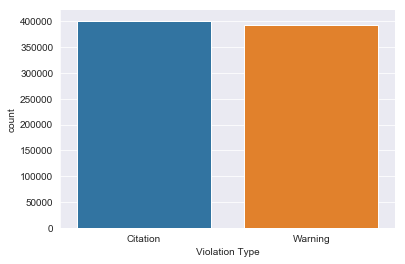

In [9]:
f, axarr = plt.plot(2,16, 8)

sns.countplot(data['Violation Type'])#, color='g')
#axarr.set_title("Violation Type", fontsize=14)

sns.despine()

In [10]:
#Stops By driver License state

data['DL State'].value_counts().nlargest(10)

MD    748418
DC      9746
XX      9483
VA      7076
FL      2496
NY      1941
CA      1748
PA      1504
NC      1131
TX       871
Name: DL State, dtype: int64

In [11]:
#Stops By driver City

data['Driver City'].value_counts().nlargest(10)

SILVER SPRING         213913
GAITHERSBURG           87332
ROCKVILLE              70460
GERMANTOWN             68267
BETHESDA               23073
MONTGOMERY VILLAGE     22892
HYATTSVILLE            19645
POTOMAC                17852
OLNEY                  14975
LAUREL                 11964
Name: Driver City, dtype: int64

In [12]:
#compare arrest type to Driver City
data.groupby('Driver City')['Description'].value_counts().nlargest(10)

Driver City    Description                                                                                      
SILVER SPRING  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           18101
               FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   10278
               DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                                8421
               FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND             7097
ROCKVILLE      DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                            6010
SILVER SPRING  PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE     5514
GAITHERSBURG   DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                            5426
SILVER SPRING  DRIVER FAILURE TO 

In [13]:
#how stop was initiated
data['Arrest Type'].value_counts()

A - Marked Patrol                         646786
Q - Marked Laser                           79945
B - Unmarked Patrol                        24120
S - License Plate Recognition               9956
O - Foot Patrol                             6670
L - Motorcycle                              6575
E - Marked Stationary Radar                 5958
G - Marked Moving Radar (Stationary)        5009
R - Unmarked Laser                          3365
I - Marked Moving Radar (Moving)            1560
M - Marked (Off-Duty)                       1154
F - Unmarked Stationary Radar                624
H - Unmarked Moving Radar (Stationary)       518
C - Marked VASCAR                            239
J - Unmarked Moving Radar (Moving)           231
P - Mounted Patrol                           196
D - Unmarked VASCAR                          178
N - Unmarked (Off-Duty)                      117
K - Aircraft Assist                           17
Name: Arrest Type, dtype: int64

In [14]:
data['Description'].value_counts().nlargest(10)

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           65295
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   38540
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                               30890
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND            22779
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                         20651
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE    19317
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                             18303
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                            17013
EXCEEDING THE POSTED SPEED LIMIT OF 30 MPH                                                           13274
EXCEEDING THE POSTED SPEED LIMIT OF 4

In [15]:
#compare arrest type to violation descriptions
data.groupby('Description')['Arrest Type'].value_counts().nlargest(10)

Description                                                                                        Arrest Type      
DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                         A - Marked Patrol    60660
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                 A - Marked Patrol    32147
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                             A - Marked Patrol    27371
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND          A - Marked Patrol    19871
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                       A - Marked Patrol    17871
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                           A - Marked Patrol    17244
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE  A - Marked Patrol    16742
D

In [16]:
data['Gender'].value_counts()

M    528779
F    263759
U       680
Name: Gender, dtype: int64

In [23]:
#lets find the percentage
test=(data['Gender'].value_counts()/data['Gender'].count())*100
test.map("{:.2f}%".format)

M    66.66%
F    33.25%
U     0.09%
Name: Gender, dtype: object

In [28]:
#comparing types of violation between male and female
data.groupby('Gender')['Description'].value_counts().nlargest(10)

Gender  Description                                                                                      
M       DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           40193
F       DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           25100
M       FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   24001
        DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                               19657
        FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND            15853
F       FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   14538
M       PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE    14430
        DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION     

In [29]:
data['Race'].value_counts()

WHITE              278554
BLACK              243941
HISPANIC           178212
ASIAN               47310
OTHER               43405
NATIVE AMERICAN      1796
Name: Race, dtype: int64

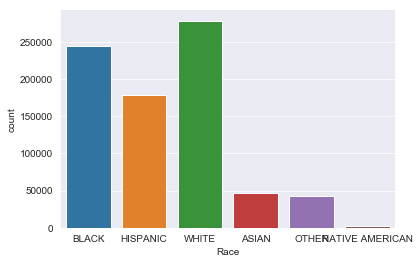

In [30]:
# Let's see what we have for Race
f, axarr = plt.plot(2,16, 16)

sns.countplot(data['Race'])#, color='g')
#axarr.set_title("Violation Type", fontsize=14)

sns.despine()

In [31]:
#Calculate the percentage
data['Race'].value_counts(normalize=True) *100

WHITE              35.116954
BLACK              30.753336
HISPANIC           22.466964
ASIAN               5.964312
OTHER               5.472014
NATIVE AMERICAN     0.226419
Name: Race, dtype: float64

In [ ]:
plt.data =['Race'].plot.bar()
plt.show()

In [32]:
#comparing types of violation by Race
data.groupby('Race')['Description'].value_counts().nlargest(10)

Race      Description                                                                                      
WHITE     DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           25884
BLACK     DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           17756
HISPANIC  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           13005
WHITE     FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   12874
BLACK     DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                               12645
          FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   12634
WHITE     DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                               10066
          DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE

In [24]:
#test=(data['Gender'].value_counts()/data['Gender'].count())*100
#test.map("{:.2f}%".format)


#percentage of violations by race
r=(data.groupby('Race')['Description'].value_counts(normalize=True).nlargest(10)) *100
r.map("{:.2f}%".format)

Race             Description                                                               
NATIVE AMERICAN  DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS    10.36%
ASIAN            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     9.63%
WHITE            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     9.29%
OTHER            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     9.01%
HISPANIC         DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     7.30%
BLACK            DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS     7.28%
ASIAN            FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER             5.95%
BLACK            DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                         5.18%
                 FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER         

In [34]:
r=(data.groupby('Alcohol')['Description'].value_counts(normalize=True).nlargest(10)) *100
r.map("{:.2f}%".format)

Alcohol  Description                                                                                      
Yes      PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE    14.26%
No       DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                            8.24%
Yes      DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER 26-204                                                  6.94%
         DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER 27-103                                                  6.31%
         POSSESSING SUSPENDED LIC.                                                                             6.16%
No       FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                    4.86%
Yes      DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQUIRED LICENSE AND AUTHORIZATION                           4.29%
         DRIVING MOTOR VEH. WHILE LIC. SUSPENDED UNDER 26-206             

In [36]:
#Fatal percentage
r=(data.groupby('Fatal')['Description'].value_counts(normalize=True).nlargest(10)) *100
r.map("{:.2f}%".format)

Fatal  Description                                                                                     
Yes    NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPRUDENT MANNER ENDANGERING PROPERTY, LIFE AND PERSON    8.89%
No     DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                          8.23%
Yes    DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                          5.93%
       FAILURE TO CONTROL VEHICLE SPEED ON HIGHWAY TO AVOID COLLISION                                      5.93%
No     FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                  4.86%
Yes    DRIVER CHANGING LANES WHEN UNSAFE                                                                   4.44%
No     DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                              3.89%
Yes    DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                         

In [27]:
def compute_outcome_stats(data):
    """Compute statistics regarding the relative quanties of arrests, warnings, and citations"""
    n_total = len(data)
    n_warnings = len(data[data['Violation Type'] == 'Warning'])
    n_citations = len(data[data['Violation Type'] == 'Citation'])
    citations_per_warning = n_citations / n_warnings
    

    return(pd.Series(data = {
        'n_total': n_total,
        'n_warnings': n_warnings,
        'n_citations': n_citations,
        'citations_per_warning': citations_per_warning,
    }))

In [28]:
#citations_per_warning - The ratio of citations to warnings. 
#A higher number signifies a greater likelihood of being ticketed 
#instead of getting off with a warning.

#compute_outcome_stats(new_df).apply("{:,}".format)
compute_outcome_stats(data).apply("{:,}".format)

#compute_outcome_stats(data)

n_total                           793,218.0
n_warnings                        392,248.0
n_citations                       400,970.0
citations_per_warning    1.0222359323693173
dtype: object

In [29]:
#Breakdown By Gender
data.groupby('Gender').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,citations_per_warning
Gender,,,,
F,263759.0,144496.0,119263.0,0.825372
M,528779.0,247179.0,281600.0,1.139255
U,680.0,573.0,107.0,0.186736


In [30]:
#Breakdown By Race
data.groupby('Race').apply(compute_outcome_stats)

,n_total,n_warnings,n_citations,citations_per_warning
Race,,,,
ASIAN,47310.0,27082.0,20228.0,0.746917
BLACK,243941.0,118090.0,125851.0,1.065721
HISPANIC,178212.0,75943.0,102269.0,1.346655
NATIVE AMERICAN,1796.0,1000.0,796.0,0.796000
OTHER,43405.0,24426.0,18979.0,0.777000
WHITE,278554.0,145707.0,132847.0,0.911741


In [33]:
data.groupby('Alcohol').apply(compute_outcome_stats)*100

,n_total,n_warnings,n_citations,citations_per_warning
Alcohol,,,,
No,79193500.0,39219400.0,39974100.0,101.924303
Yes,128300.0,5400.0,122900.0,2275.925926


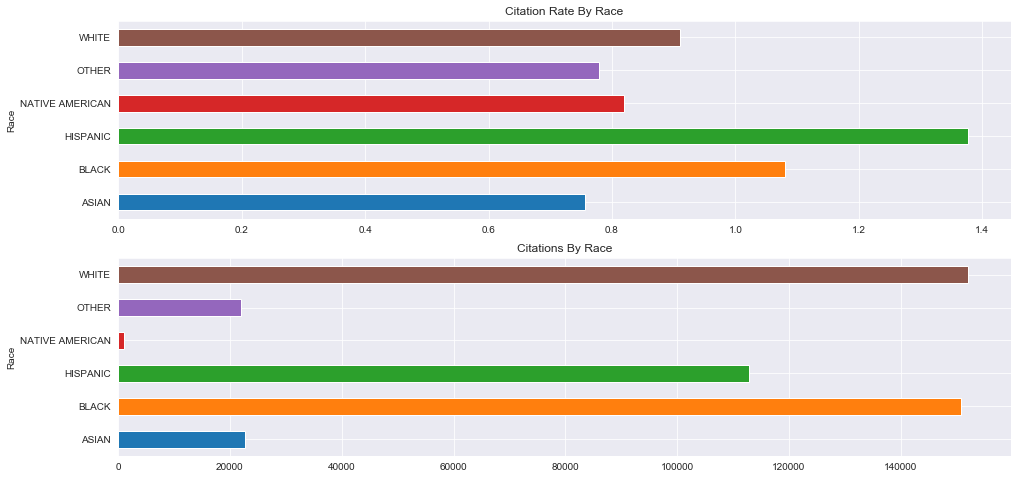

In [48]:
#citation Rate by Race
#citation Rate by Race
race_agg = data.groupby(['Race']).apply(compute_outcome_stats)
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=figsize)
race_agg['citations_per_warning'].plot.barh(ax=axes[0], figsize=figsize, title="Citation Rate By Race")
race_agg['n_citations'].plot.barh(ax=axes[1], figsize=figsize, title='Citations By Race')

In [49]:
# Counting the violations by State
data = data[data.State.notnull()]
aggResult = data.groupby(by=['State'])['Fatal'].agg({'Count': np.size})
aggResult['Count'] = aggResult.Count.astype(int)
aggResult = aggResult.sort_values(by = 'Count', ascending=False)
aggResult = aggResult.reset_index()
aggResult.head()

,State,Count
0,MD,793218
1,VA,41191
2,DC,24136
3,PA,6775
4,TX,4460


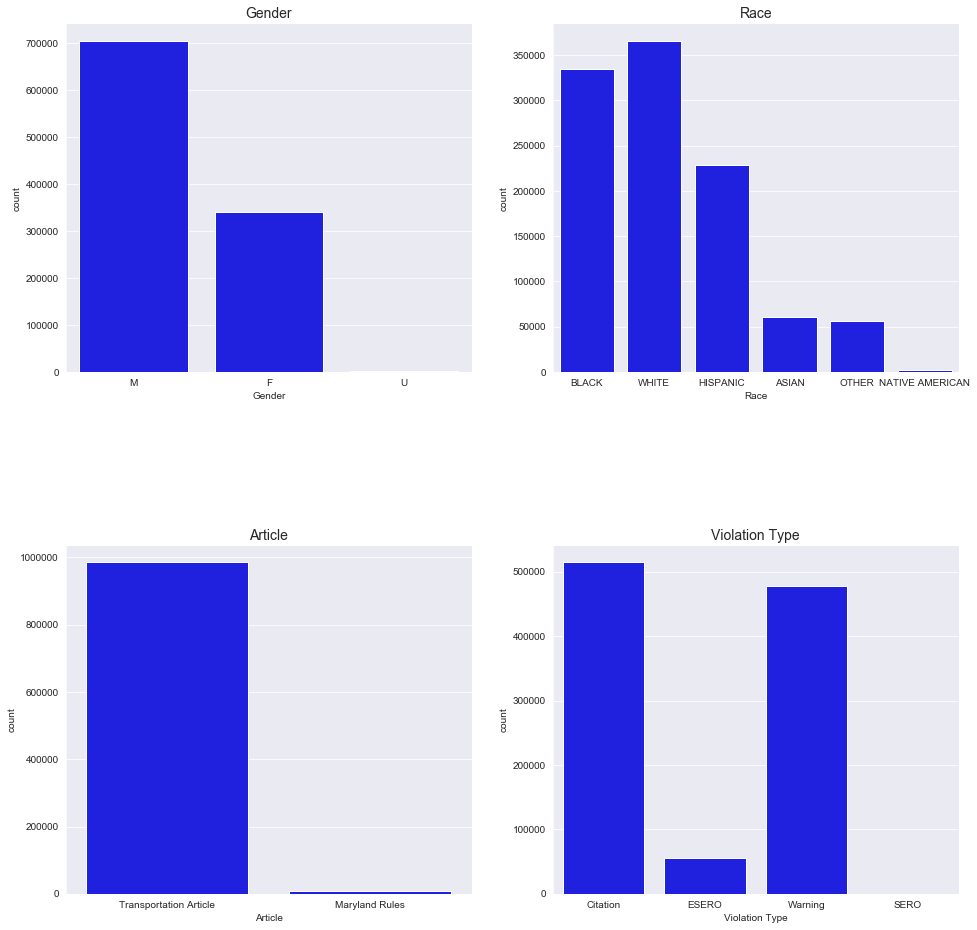

In [50]:
# Let's see the kinds of violations
f, axarr = plt.subplots(2, 2, figsize=(16, 16))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Gender'], ax=axarr[0][0])#, color#='blue')
axarr[0][0].set_title("Gender", fontsize=14)

sns.countplot(df['Race'], ax=axarr[0][1])#, color='blue')
axarr[0][1].set_title("Race", fontsize=14)

sns.countplot(df['Article'], ax=axarr[1][0])#, color='blue')
axarr[1][0].set_title("Article", fontsize=14)

sns.countplot(df['Violation Type'], ax=axarr[1][1])#, color='blue')
axarr[1][1].set_title("Violation Type", fontsize=14)

sns.despine()

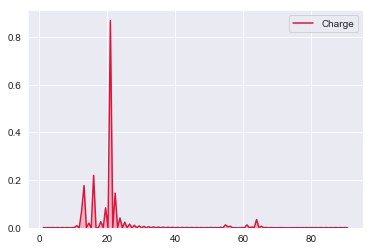

In [51]:
# Let's see the Charge distribution
df['Charge'] = df['Charge'].apply(lambda x: re.findall(r"\d+\.?\d*", x)[0]).astype(float)
kde_kwargs = {'color': 'crimson', 'shade': True}
vis1 = sns.kdeplot(df['Charge'], **kde_kwargs)

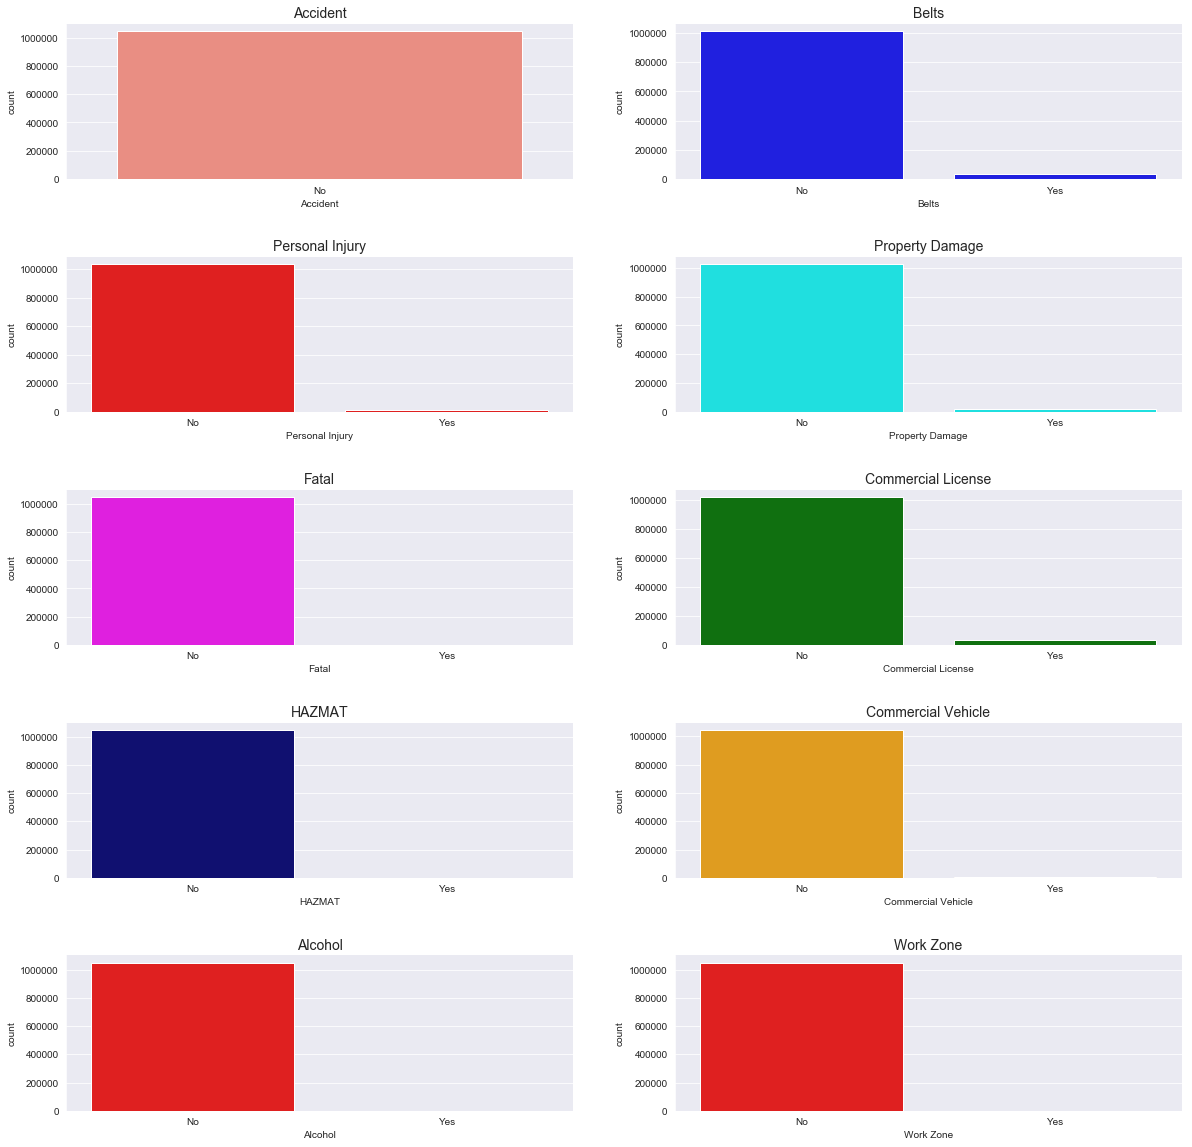

In [52]:
# Let's see the violations kinds
f, axarr = plt.subplots(5, 2, figsize=(20, 20))

f.subplots_adjust(hspace=0.5)

sns.countplot(df['Accident'], ax=axarr[0][0], color='salmon')
axarr[0][0].set_title("Accident", fontsize=14)

sns.countplot(df['Belts'], ax=axarr[0][1], color='blue')
axarr[0][1].set_title("Belts", fontsize=14)

sns.countplot(df['Personal Injury'], ax=axarr[1][0], color='red')
axarr[1][0].set_title("Personal Injury", fontsize=14)

sns.countplot(df['Property Damage'], ax=axarr[1][1], color='cyan')
axarr[1][1].set_title("Property Damage", fontsize=14)

sns.countplot(df['Fatal'], ax=axarr[2][0], color='magenta')
axarr[2][0].set_title("Fatal", fontsize=14)

sns.countplot(df['Commercial License'], ax=axarr[2][1], color='green')
axarr[2][1].set_title("Commercial License", fontsize=14)

sns.countplot(df['HAZMAT'], ax=axarr[3][0], color='navy')
axarr[3][0].set_title("HAZMAT", fontsize=14)

sns.countplot(df['Commercial Vehicle'], ax=axarr[3][1], color='orange')
axarr[3][1].set_title("Commercial Vehicle", fontsize=14)

sns.countplot(df['Alcohol'], ax=axarr[4][0], color='red')
axarr[4][0].set_title("Alcohol", fontsize=14)

sns.countplot(df['Work Zone'], ax=axarr[4][1], color='red')
axarr[4][1].set_title("Work Zone", fontsize=14)

sns.despine()